In [192]:
import numpy as np
import pandas as pd

In [193]:
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/2021_10_25_bike/train.csv', parse_dates = ['datetime'])

In [194]:
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/2021_10_25_bike/test.csv', parse_dates = ['datetime'])

In [195]:
sub = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/2021_10_25_bike/sampleSubmission.csv')

In [196]:
train.shape, test.shape, sub.shape

((10886, 12), (6493, 9), (6493, 2))

In [197]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [198]:
import matplotlib.pyplot as plt

(array([4284., 2337., 1686., 1067.,  633.,  426.,  233.,  116.,   85.,
          19.]),
 array([  1. ,  98.6, 196.2, 293.8, 391.4, 489. , 586.6, 684.2, 781.8,
        879.4, 977. ]),
 <a list of 10 Patch objects>)

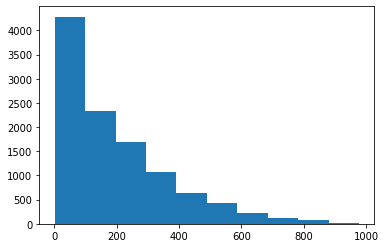

In [199]:
plt.hist(train['count'])

In [200]:
import seaborn as sns

In [201]:
new_tr = train.copy()
new_test = test.copy()

In [202]:
new_tr['year'] = new_tr['datetime'].dt.year
new_tr['month'] = new_tr['datetime'].dt.month
new_tr['day'] = new_tr['datetime'].dt.day
new_tr['hour'] = new_tr['datetime'].dt.hour
new_tr['minute'] = new_tr['datetime'].dt.minute
new_tr['second'] = new_tr['datetime'].dt.second

In [203]:
new_test['year'] = new_test['datetime'].dt.year
new_test['month'] = new_test['datetime'].dt.month
new_test['day'] = new_test['datetime'].dt.day
new_test['hour'] = new_test['datetime'].dt.hour
new_test['minute'] = new_test['datetime'].dt.minute
new_test['second'] = new_test['datetime'].dt.second

new_test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour,minute,second
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,1,20,0,0,0
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,1,0,0
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,2,0,0
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3,0,0
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,4,0,0


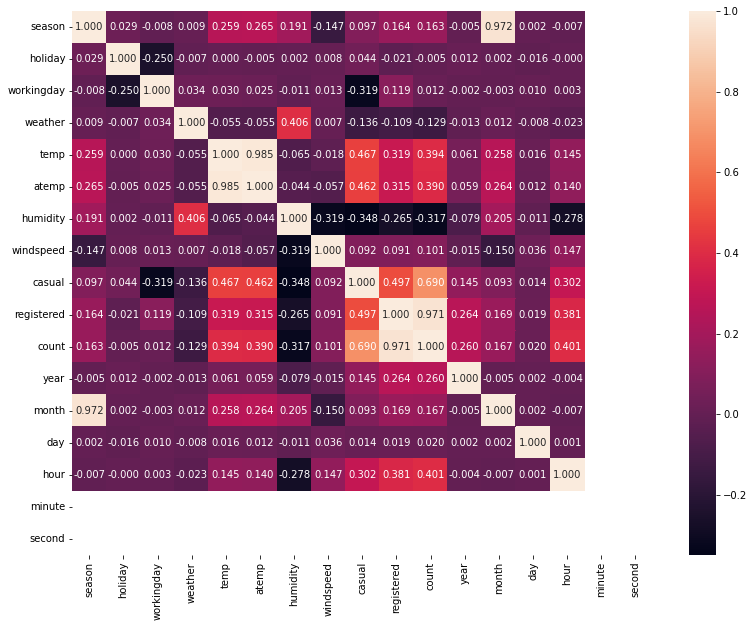

In [204]:
plt.figure(figsize=(13,10))
val = new_tr.corr()
sns.heatmap(val, annot=True, fmt='.3f')

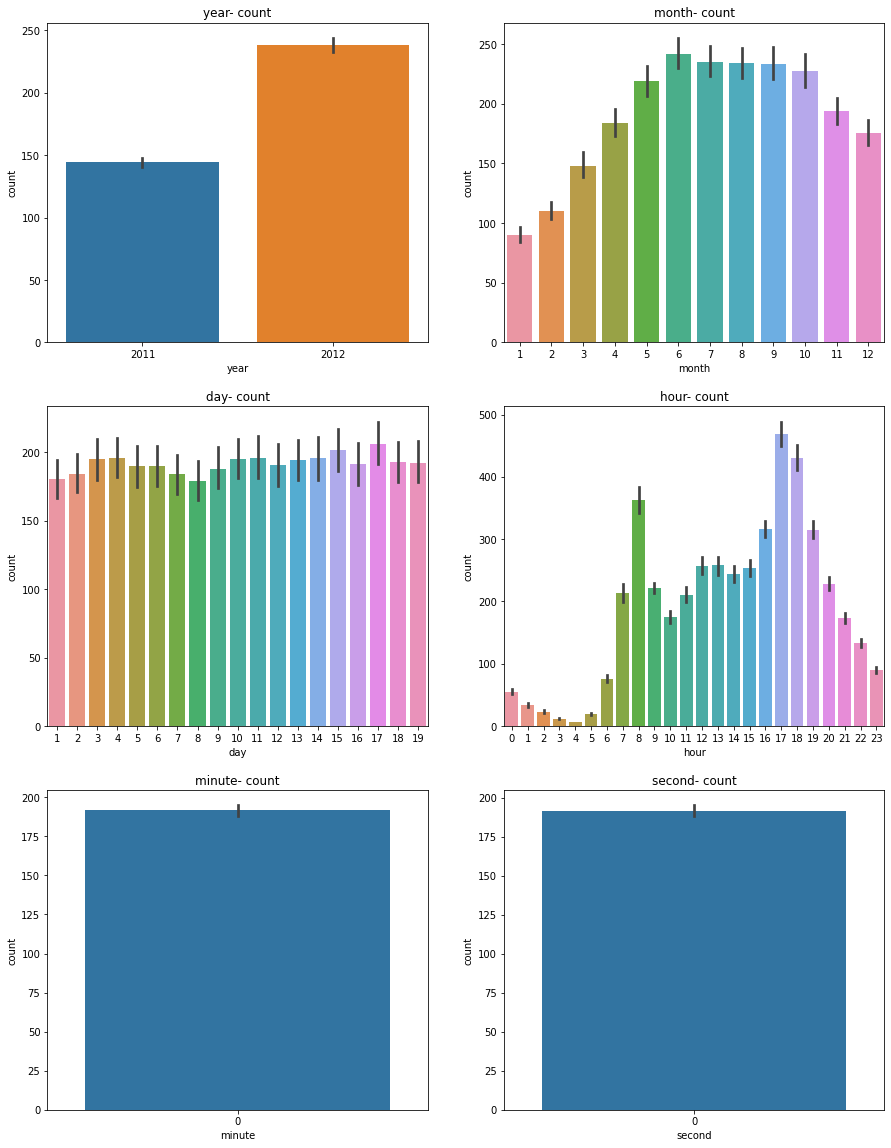

In [205]:
datetime_names = ['year', 'month', 'day', 'hour', 'minute', 'second']

plt.figure(figsize=(15,20))
for idx, name in enumerate(datetime_names):
    plt.subplot(3,2,idx+1)
    sns.barplot(x=name, y='count', data=new_tr)
    plt.title(name + "- count")
    
plt.show()

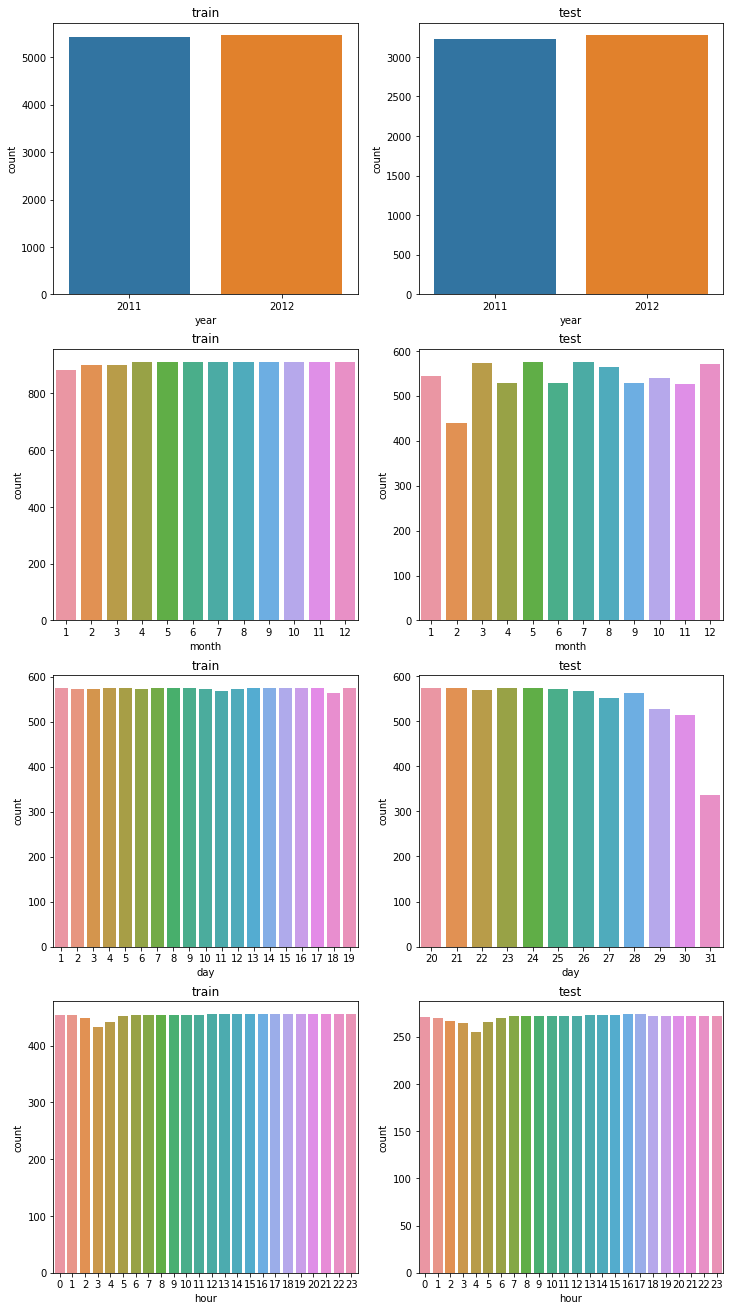

In [206]:
col_names = ['year','month','day','hour']

i = 0
plt.figure(figsize=(12,35))  ##전체 그래프 크기 지정

for name in col_names: ## 컬럼명으로 반복
  i = i+1
  plt.subplot(6,2,i)  ##2행2열, i = 1,2,3,4 (왼쪽 상단부터 시계방향으로 순번 지정)
  sns.countplot(x=name, data = new_tr)
  plt.title('train')
  
  i = i+1
  plt.subplot(6,2,i)  ##2행2열, i = 1,2,3,4 (왼쪽 상단부터 시계방향으로 순번 지정)
  sns.countplot(x=name, data = new_test)
  plt.title('test')
  
plt.show()

In [207]:
new_tr['dayofweek'] = new_tr['datetime'].dt.dayofweek
new_test['dayofweek'] = new_test['datetime'].dt.dayofweek

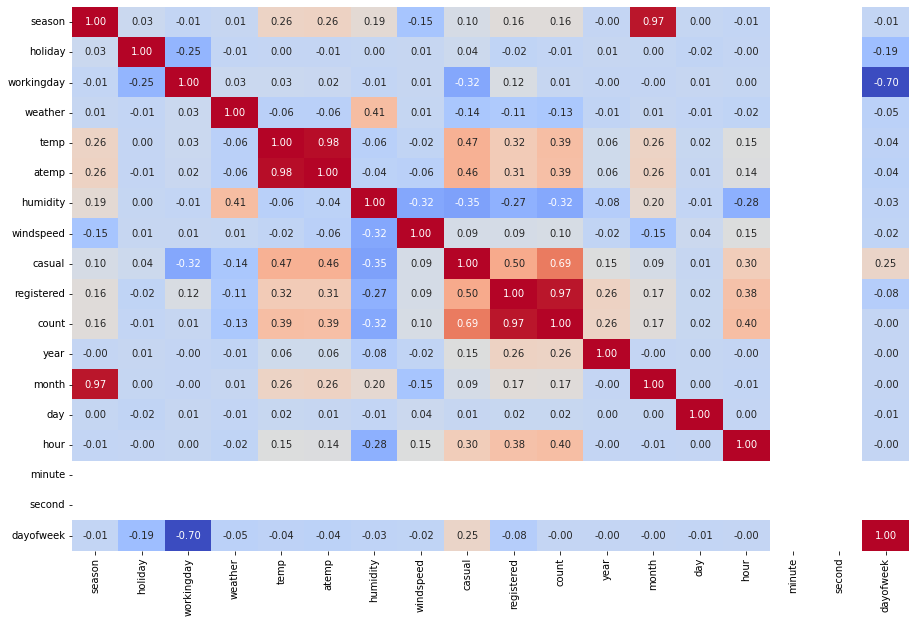

In [208]:
plt.figure(figsize=(15,10))
g = sns.heatmap(new_tr.corr(), annot=True, fmt=".2f", cmap="coolwarm", cbar=False)

In [209]:
feature_names = [ 'season', 'holiday', 'workingday', 'weather', 
                  'temp', 'atemp', 'humidity', 'windspeed', 
                  "year", "hour", "dayofweek"]  # 공통 변수

X_tr_all = new_tr[feature_names]  # 학습용 데이터 변수 선택
X_test_all = new_test[feature_names]    # 테스트 데이터의 변수 선택 
print(X_tr_all.head())

   season  holiday  workingday  weather  ...  windspeed  year  hour  dayofweek
0       1        0           0        1  ...        0.0  2011     0          5
1       1        0           0        1  ...        0.0  2011     1          5
2       1        0           0        1  ...        0.0  2011     2          5
3       1        0           0        1  ...        0.0  2011     3          5
4       1        0           0        1  ...        0.0  2011     4          5

[5 rows x 11 columns]


In [210]:
label_name = 'count'                 # 렌탈 대수 (종속변수)
y_tr_all = new_tr[label_name]        # 렌탈 대수 변수 값 선택

In [211]:
from sklearn.model_selection import train_test_split

In [212]:
X_train, X_test, y_train, y_test = train_test_split(X_tr_all, 
                                                    y_tr_all,
                                                    test_size=0.3,
                                                    random_state=77)

In [213]:
from sklearn.linear_model import LinearRegression   

model = LinearRegression()  # 모델 객체 생성.
model.fit(X_train, y_train)   

# 정확도 확인
print("학습용 세트 정확도: {:.3f}".format(model.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(model.score(X_test, y_test)))

학습용 세트 정확도: 0.391
테스트 세트 정확도: 0.377


In [214]:
from sklearn.tree import DecisionTreeRegressor   

model = DecisionTreeRegressor()  # 모델 객체 생성.
model.fit(X_train, y_train)   

# 정확도 확인
print("학습용 세트 정확도: {:.3f}".format(model.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(model.score(X_test, y_test)))

학습용 세트 정확도: 1.000
테스트 세트 정확도: 0.895


In [215]:
from sklearn.ensemble import RandomForestRegressor   # 앙상블(의사결정트리 확장판)

seed = 37
model = RandomForestRegressor(n_jobs=-1, random_state=seed)  # 모델 객체 생성.
model.fit(X_train, y_train)           # 모델 학습(공부가 되었다.)  

# 정확도 확인
print("학습용 세트 정확도: {:.3f}".format(model.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(model.score(X_test, y_test)))

학습용 세트 정확도: 0.992
테스트 세트 정확도: 0.946


In [216]:
from sklearn.ensemble import GradientBoostingRegressor

seed = 37
model = GradientBoostingRegressor(random_state=seed)  # 모델 객체 생성.
model.fit(X_train, y_train)           # 모델 학습(공부가 되었다.)  

# 정확도 확인
print("학습용 세트 정확도: {:.3f}".format(model.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(model.score(X_test, y_test)))

학습용 세트 정확도: 0.860
테스트 세트 정확도: 0.849


In [217]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures

In [218]:
scaler = MinMaxScaler().fit(X_tr_all)

nor_X_tr_all = scaler.transform(X_tr_all)
ex_X_tr = PolynomialFeatures(degree=2, 
                             include_bias=False).fit_transform(nor_X_tr_all)

y_tr_all = new_tr['count']

In [219]:
from sklearn.ensemble import RandomForestRegressor   # 앙상블(의사결정트리 확장판)

seed = 37
model = RandomForestRegressor(n_jobs=-1, random_state=seed)  # 모델 객체 생성.
model.fit(X_train, y_train)           # 모델 학습(공부가 되었다.)  

# 정확도 확인
print("학습용 세트 정확도: {:.3f}".format(model.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(model.score(X_test, y_test)))

학습용 세트 정확도: 0.992
테스트 세트 정확도: 0.946


In [220]:
nor_X_test_all = scaler.transform(X_test_all)
ex_X_test = PolynomialFeatures(degree=2, 
                             include_bias=False).fit_transform(nor_X_test_all)

In [222]:
pred = model.predict(ex_X_test)
sub['count'] = pred
sub.loc[ sub['count'] <0 , 'count' ] =0
sub.to_csv('four_sub.csv', index=False)

ValueError: ignored

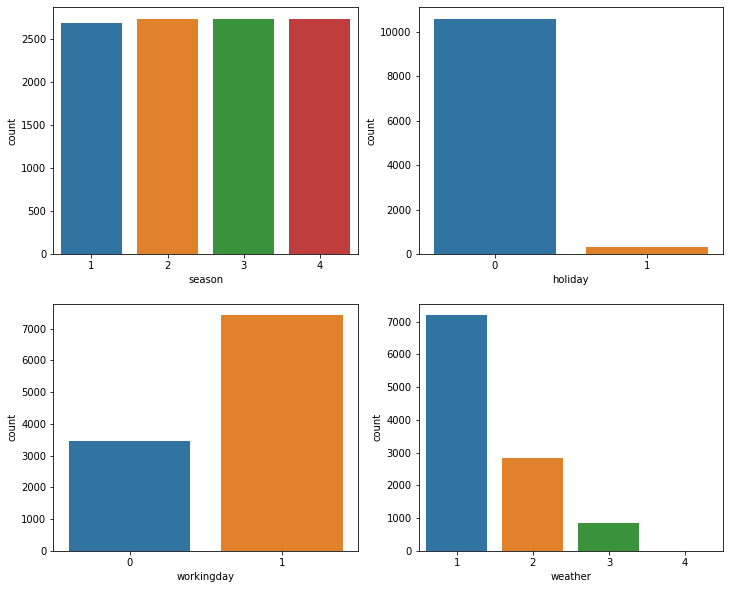

In [162]:
col_names = [ 'season', 'holiday', 'workingday', 'weather'  ]
i = 0
plt.figure(figsize=(12,10))   # 전체 그래프의 크기 지정 

for name in col_names:        # 컬럼명을 전달 리스트 수 만큼 반복 -> 4회 
    i = i + 1                 # 숫자를 1씩 증가.
    plt.subplot(2,2,i)        # 2행 2열에 i번째 그래프 선택
    sns.countplot(x=name, data=train)  # i번째 그래프에 sns.countplot를 그리겠다.

In [163]:
### temp, atemp, humidity, windspeed

num_names = ['temp', 'atemp', 'humidity', 'windspeed']
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

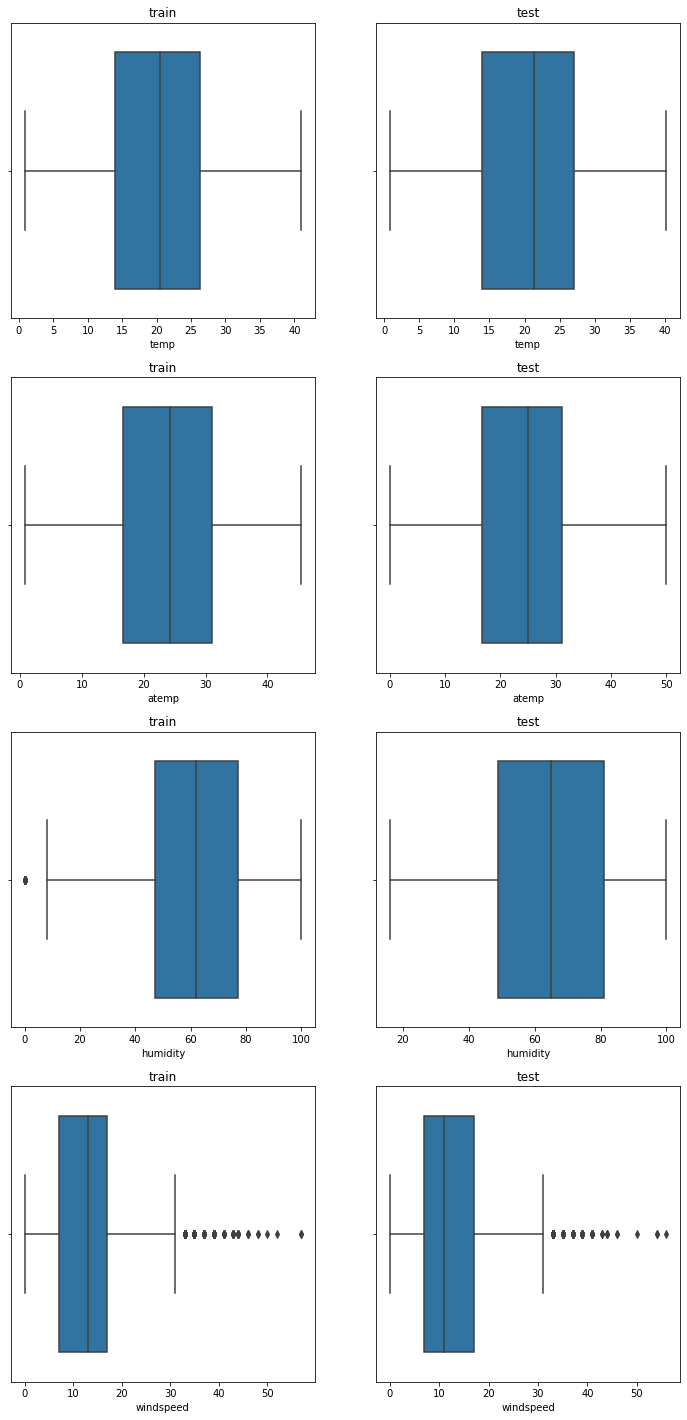

In [164]:
i = 0
plt.figure(figsize=(12,25))   # 전체 그래프의 크기 지정 (가로, 세로)

for name in num_names:        # 컬럼명을 전달 리스트 수 만큼 반복 -> 4회
    i = i + 1                 # 숫자를 1씩 증가.
    plt.subplot(4,2,i*2-1)        # 2행 2열에 i번째 그래프 선택
    sns.boxplot(x=name, data=train)  # i번째 그래프에 sns.countplot를 그리겠다.
    plt.title("train")
    plt.subplot(4,2,i*2)        # 2행 2열에 i번째 그래프 선택
    sns.boxplot(x=name, data=test)  # i번째 그래프에 sns.countplot를 그리겠다.
    plt.title("test")
plt.show() 

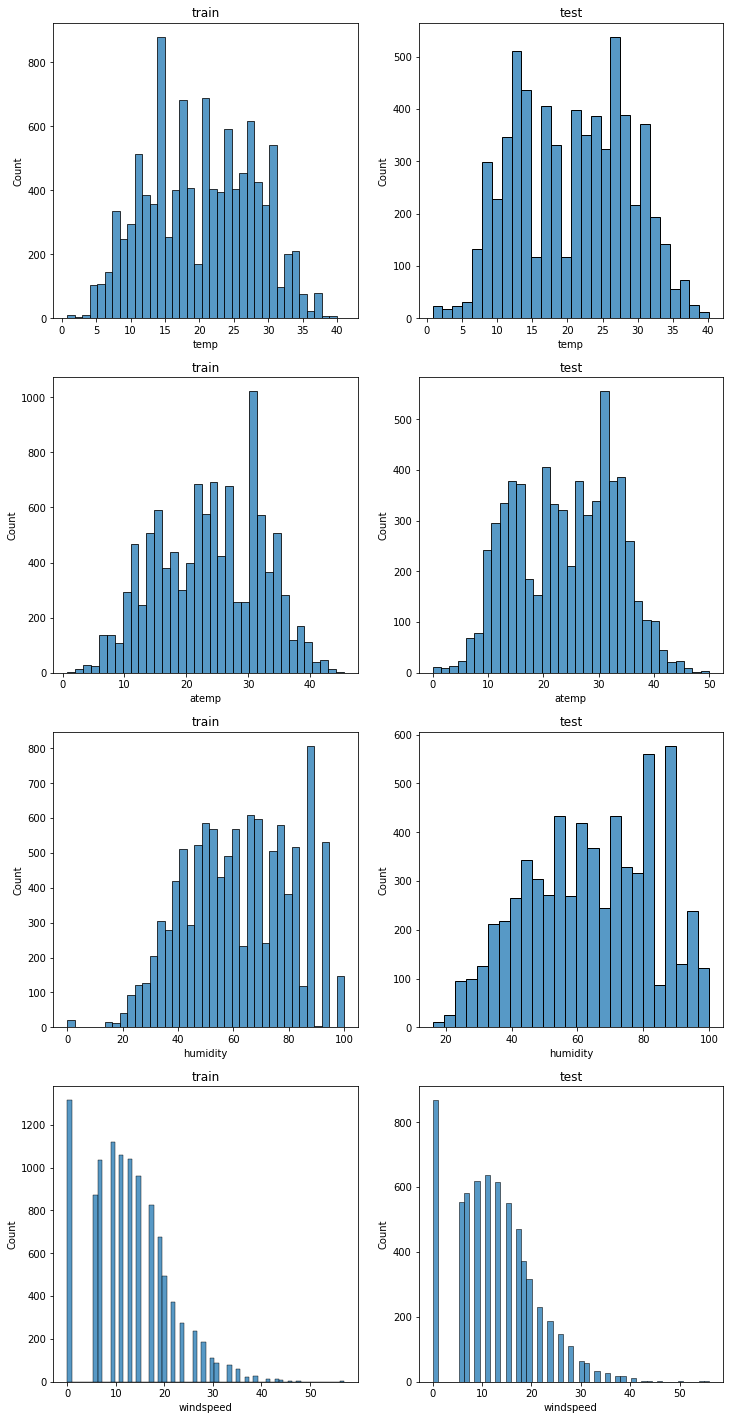

In [165]:
i = 0
plt.figure(figsize=(12,25))   # 전체 그래프의 크기 지정 (가로, 세로)

for name in num_names:        # 컬럼명을 전달 리스트 수 만큼 반복 -> 4회
    i = i + 1                 # 숫자를 1씩 증가.
    plt.subplot(4,2,i*2-1)        # 2행 2열에 i번째 그래프 선택
    sns.histplot(x=name, data=train)  # i번째 그래프에 sns.countplot를 그리겠다.
    plt.title("train")
    
    plt.subplot(4,2,i*2)        # 2행 2열에 i번째 그래프 선택
    sns.histplot(x=name, data=test)  # i번째 그래프에 sns.countplot를 그리겠다.
    plt.title("test")
plt.show() 

In [166]:
new_tr = train.copy()
new_test = test.copy()

In [167]:
new_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [168]:
new_tr['year'] = new_tr['datetime'].dt.year
new_tr['month'] = new_tr['datetime'].dt.month
new_tr['day'] = new_tr['datetime'].dt.day
new_tr['hour'] = new_tr['datetime'].dt.hour
new_tr['minute'] = new_tr['datetime'].dt.minute
new_tr['second'] = new_tr['datetime'].dt.second

In [169]:
new_test['year'] = new_test['datetime'].dt.year
new_test['month'] = new_test['datetime'].dt.month
new_test['day'] = new_test['datetime'].dt.day
new_test['hour'] = new_test['datetime'].dt.hour
new_test['minute'] = new_test['datetime'].dt.minute
new_test['second'] = new_test['datetime'].dt.second

new_test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour,minute,second
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,1,20,0,0,0
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,1,0,0
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,2,0,0
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3,0,0
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,4,0,0


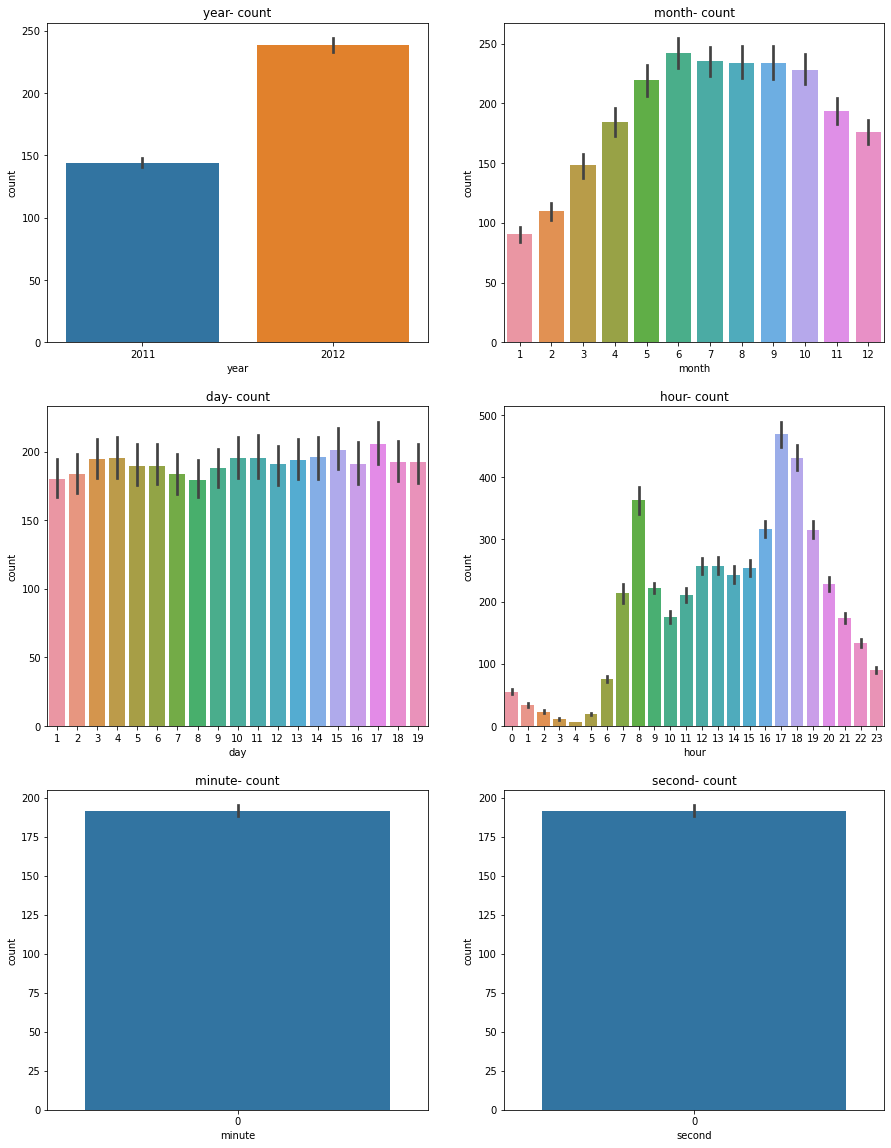

In [170]:
datetime_names = ['year', 'month', 'day', 'hour', 'minute', 'second']

plt.figure(figsize=(15,20))
for idx, name in enumerate(datetime_names):
    plt.subplot(3,2,idx+1)
    sns.barplot(x=name, y='count', data=new_tr)
    plt.title(name + "- count")
    
plt.show()

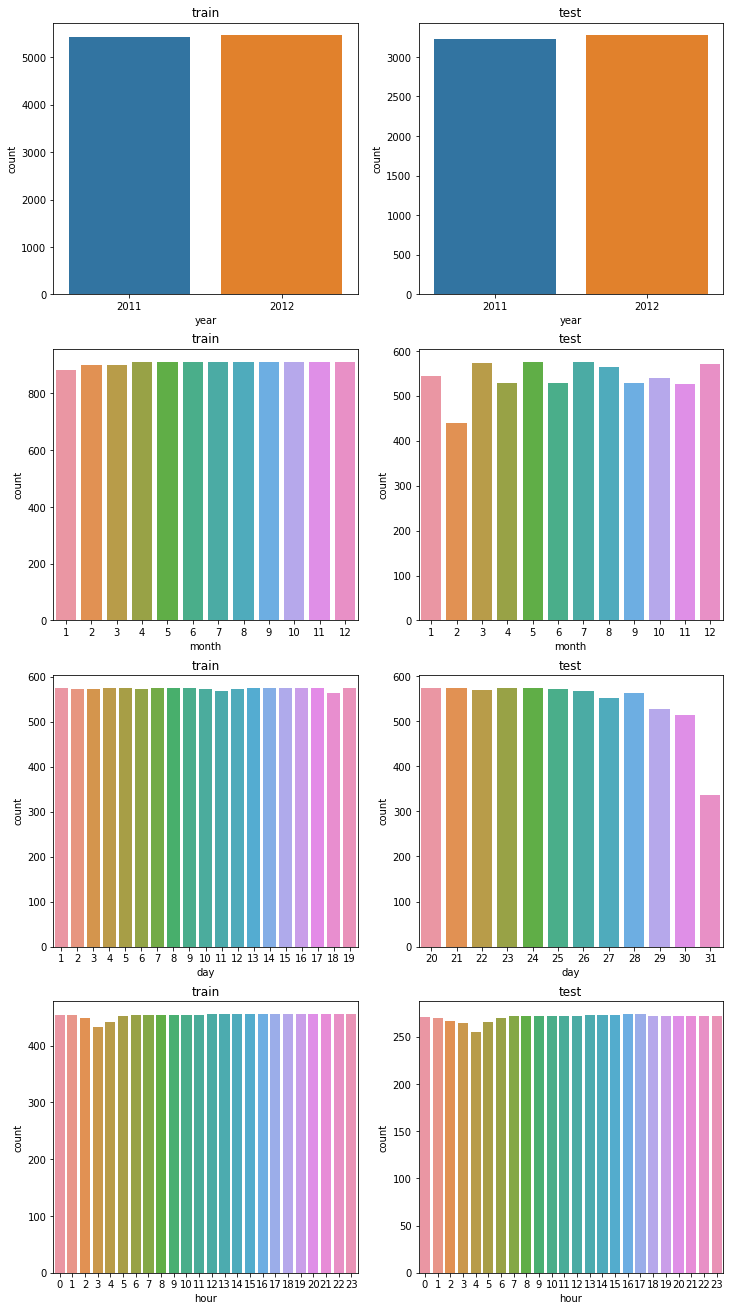

In [171]:
col_names = ['year','month','day','hour']

i = 0
plt.figure(figsize=(12,35))  ##전체 그래프 크기 지정

for name in col_names: ## 컬럼명으로 반복
  i = i+1
  plt.subplot(6,2,i)  ##2행2열, i = 1,2,3,4 (왼쪽 상단부터 시계방향으로 순번 지정)
  sns.countplot(x=name, data = new_tr)
  plt.title('train')
  
  i = i+1
  plt.subplot(6,2,i)  ##2행2열, i = 1,2,3,4 (왼쪽 상단부터 시계방향으로 순번 지정)
  sns.countplot(x=name, data = new_test)
  plt.title('test')
  
plt.show()

In [172]:
new_tr['dayofweek'] = new_tr['datetime'].dt.dayofweek
new_test['dayofweek'] = new_test['datetime'].dt.dayofweek


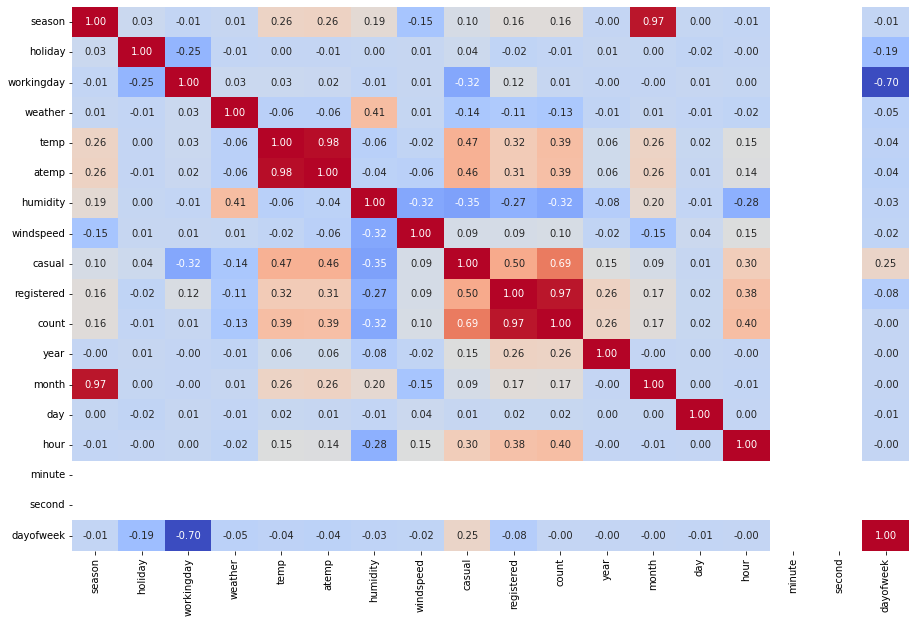

In [173]:
plt.figure(figsize=(15,10))
g = sns.heatmap(new_tr.corr(), annot=True, fmt=".2f", cmap="coolwarm", cbar=False)

In [174]:
feature_names = [ 'season', 'holiday', 'workingday', 'weather', 
                  'temp', 'atemp', 'humidity', 'windspeed', 
                  "year", "hour", "dayofweek"]  # 공통 변수

X_tr_all = new_tr[feature_names]  # 학습용 데이터 변수 선택
X_test_all = new_test[feature_names]    # 테스트 데이터의 변수 선택 
print(X_tr_all.head())

   season  holiday  workingday  weather  ...  windspeed  year  hour  dayofweek
0       1        0           0        1  ...        0.0  2011     0          5
1       1        0           0        1  ...        0.0  2011     1          5
2       1        0           0        1  ...        0.0  2011     2          5
3       1        0           0        1  ...        0.0  2011     3          5
4       1        0           0        1  ...        0.0  2011     4          5

[5 rows x 11 columns]


In [175]:
label_name = 'count'                 # 렌탈 대수 (종속변수)
y_tr_all = new_tr[label_name]        # 렌탈 대수 변수 값 선택

In [176]:
from sklearn.model_selection import train_test_split

In [177]:
X_train, X_test, y_train, y_test = train_test_split(X_tr_all, 
                                                    y_tr_all,
                                                    test_size=0.3,
                                                    random_state=77)

In [178]:
from sklearn.linear_model import LinearRegression   

model = LinearRegression()  # 모델 객체 생성.
model.fit(X_train, y_train)   

# 정확도 확인
print("학습용 세트 정확도: {:.3f}".format(model.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(model.score(X_test, y_test)))

학습용 세트 정확도: 0.391
테스트 세트 정확도: 0.377


In [179]:
from sklearn.tree import DecisionTreeRegressor   

model = DecisionTreeRegressor()  # 모델 객체 생성.
model.fit(X_train, y_train)   

# 정확도 확인
print("학습용 세트 정확도: {:.3f}".format(model.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(model.score(X_test, y_test)))

학습용 세트 정확도: 1.000
테스트 세트 정확도: 0.889


In [180]:
from sklearn.ensemble import RandomForestRegressor   # 앙상블(의사결정트리 확장판)

seed = 37
model = RandomForestRegressor(n_jobs=-1, random_state=seed)  # 모델 객체 생성.
model.fit(X_train, y_train)           # 모델 학습(공부가 되었다.)  

# 정확도 확인
print("학습용 세트 정확도: {:.3f}".format(model.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(model.score(X_test, y_test)))

학습용 세트 정확도: 0.992
테스트 세트 정확도: 0.946


In [181]:
from sklearn.ensemble import GradientBoostingRegressor

seed = 37
model = GradientBoostingRegressor(random_state=seed)  # 모델 객체 생성.
model.fit(X_train, y_train)           # 모델 학습(공부가 되었다.)  

# 정확도 확인
print("학습용 세트 정확도: {:.3f}".format(model.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(model.score(X_test, y_test)))

학습용 세트 정확도: 0.860
테스트 세트 정확도: 0.849


In [182]:
from sklearn.ensemble import RandomForestRegressor   # 앙상블(의사결정트리 확장판)

seed = 37
model = RandomForestRegressor(n_jobs=-1, random_state=seed)  # 모델 객체 생성.
model.fit(X_train, y_train)           # 모델 학습(공부가 되었다.)  

# 정확도 확인
print("학습용 세트 정확도: {:.3f}".format(model.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(model.score(X_test, y_test)))

pred = model.predict(X_test_all)

학습용 세트 정확도: 0.992
테스트 세트 정확도: 0.946


In [183]:
sub['count'] = pred
sub.loc[sub['count']< 0, 'count'] = 0
sub.to_csv('third_sub.csv', index = False)

In [184]:
model.feature_importances_

array([0.03628539, 0.00232723, 0.03567138, 0.01622299, 0.08177621,
       0.03988315, 0.0316861 , 0.01059026, 0.08779102, 0.60955708,
       0.04820919])

In [185]:
X_train.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'year', 'hour', 'dayofweek'],
      dtype='object')

In [186]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures

In [187]:
scaler = MinMaxScaler().fit(X_tr_all)

nor_X_tr_all = scaler.transform(X_tr_all)
ex_X_tr = PolynomialFeatures(degree=2, 
                             include_bias=False).fit_transform(nor_X_tr_all)

y_tr_all = new_tr['count']

In [188]:
from sklearn.ensemble import RandomForestRegressor   # 앙상블(의사결정트리 확장판)

seed = 37
model = RandomForestRegressor(n_jobs=-1, random_state=seed)  # 모델 객체 생성.
model.fit(X_train, y_train)           # 모델 학습(공부가 되었다.)  

# 정확도 확인
print("학습용 세트 정확도: {:.3f}".format(model.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(model.score(X_test, y_test)))

학습용 세트 정확도: 0.992
테스트 세트 정확도: 0.946


In [189]:
nor_X_test_all = scaler.transform(X_test_all)
ex_X_test = PolynomialFeatures(degree=2, 
                             include_bias=False).fit_transform(nor_X_test_all)

In [190]:
ex_X_test.shape

(6493, 77)

In [191]:
pred = model.predict(ex_X_test)
sub['count'] = pred
sub.loc[ sub['count'] <0 , 'count' ] =0
sub.to_csv('four_sub.csv', index=False)

ValueError: ignored